<a href="https://colab.research.google.com/github/tejinder1988/PyProject/blob/main/UFO_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import plotly.express as px
from collections import Counter
import numpy as np

In [51]:
pd.set_option('display.max_rows', 500)

In [4]:
url = 'https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/3-Web-App/1-Web-App/data/ufos.csv'
df = pd.read_csv(url, index_col=0)

In [5]:
df['timestamp']=df.index

In [6]:
df=df.dropna()

In [7]:
df.country.value_counts()

us    63553
ca     2942
gb       11
au       10
Name: country, dtype: int64

In [8]:
df.index=range(len(df))

In [9]:
df["date"]=df["timestamp"].str[:-6]
df["date"]=pd.to_datetime(df["date"], format="%m/%d/%Y")
df["year"]=pd.DatetimeIndex(df['date']).year
df["month"]=pd.DatetimeIndex(df['date']).month

In [56]:
df = df[(df["year"]>1950) & (df["year"]<2014)]

In [57]:
len(df[["duration (seconds)"]])

21455

In [58]:
len(df[df["duration (seconds)"]>300])

21455

In [59]:
df=df[df["duration (seconds)"]>300]

In [60]:
df_subset_bycountry = df[["year","country"]]
df_groupby_bycountry = df_subset_bycountry.groupby(["year","country"]).size()
#df_subset.groupby(["year","country"]).size()

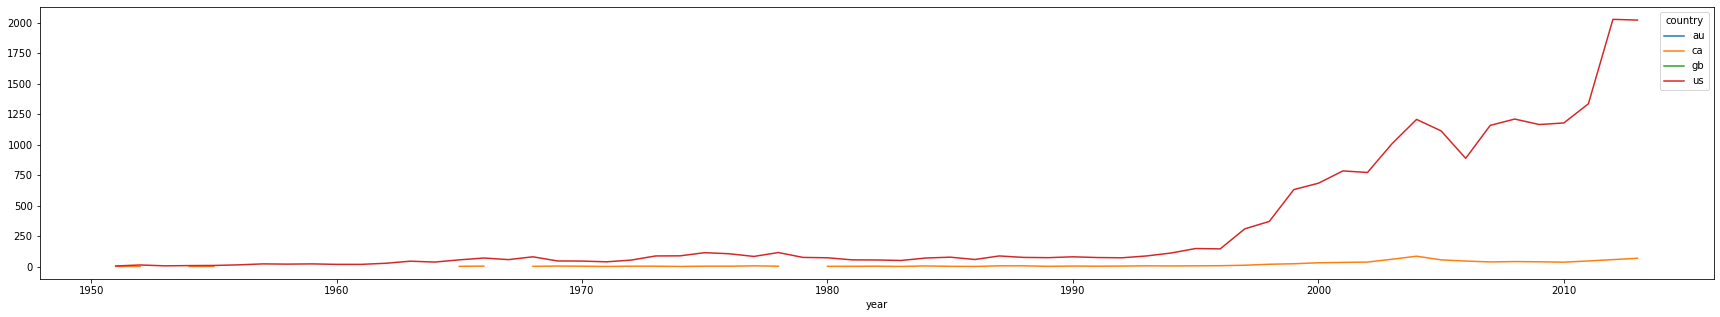

In [61]:
df_groupby_bycountry.unstack().plot(figsize=(30,5))

In [63]:
df["shape"].groupby(df["shape"]).count()

shape
changed         1
changing      848
chevron       193
cigar         477
circle       2112
cone          100
crescent        1
cross          63
cylinder      314
delta           3
diamond       371
disk         1558
egg           185
fireball     1156
flash         273
formation     685
light        4965
other        1562
oval         1018
rectangle     301
round           1
sphere       1436
teardrop      167
triangle     1964
unknown      1701
Name: shape, dtype: int64

In [76]:
df["shape"][df["shape"].isin(["crescent","round","delta","changed"]) == False].groupby(df["shape"]).count()

shape
changing      848
chevron       193
cigar         477
circle       2112
cone          100
cross          63
cylinder      314
diamond       371
disk         1558
egg           185
fireball     1156
flash         273
formation     685
light        4965
other        1562
oval         1018
rectangle     301
sphere       1436
teardrop      167
triangle     1964
unknown      1701
Name: shape, dtype: int64

In [81]:
df = df[df["shape"].isin(["crescent","round","delta","changed"]) == False]

In [82]:
df_subset_byshape= df[["year","shape"]]
df_groupby_byshape = df_subset_byshape.groupby(["year","shape"]).size()
#df_subset_byshape.groupby(["year","shape"]).size()

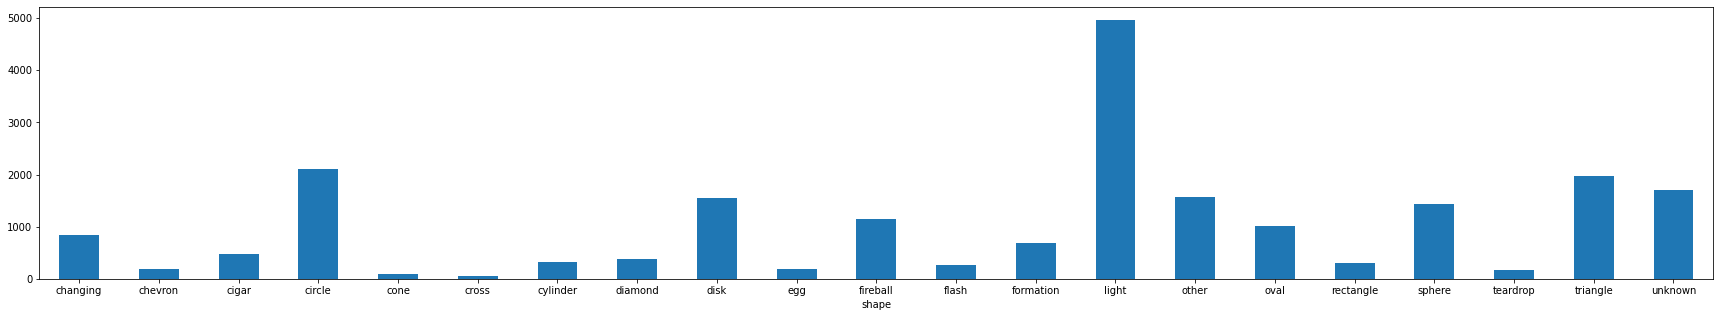

In [83]:
df["shape"].groupby(df["shape"]).count().plot.bar(x='lab', y='val', rot=0,figsize=(30,5))

In [13]:
df.head()

,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,timestamp,date,year,month
1,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833,10/10/1956 21:00,1956-10-10,1956,10
2,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611,10/10/1960 20:00,1960-10-10,1960,10
3,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.595000,-82.188889,10/10/1961 19:00,1961-10-10,1961,10
4,norwalk,ct,us,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.117500,-73.408333,10/10/1965 23:45,1965-10-10,1965,10
5,pell city,al,us,disk,180.0,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/2009,33.586111,-86.286111,10/10/1966 20:00,1966-10-10,1966,10
